# Visualizations
This notebook is dedicated to produce outputs and visualizations for the presentation and the paper.

In [2]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from custom import load_img, show, show_bands, minmax_img, show_hist, show_img_mask, show_img_hist

histos   = pd.read_csv('dataset/dev_hist.csv', header=[0,1], index_col=[0,1])
metadata = pd.read_csv('dataset/metadata.csv', index_col=['src','slice_num'])

We load two samples of images, one contains a glacier and the other does not:

In [7]:
glac    = load_img(metadata.loc[3,56].img_slice)
no_glac = load_img(metadata.loc[7,94].img_slice)
glac_mask    = load_img(metadata.loc[3,56].mask_slice, minmax=False)
no_glac_mask = load_img(metadata.loc[7,94].mask_slice, minmax=False)
glac_hist = histos.loc[3,56]
no_glac_hist = histos.loc[7,94]

A glacier image and its mask

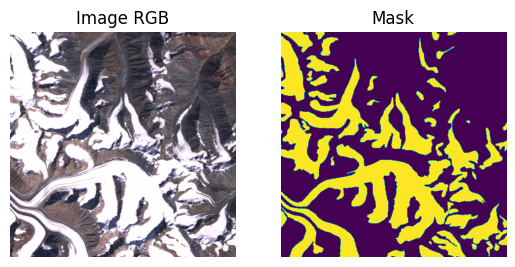

In [5]:
show_img_mask(glac, glac_mask)

A non glacier image and its mask

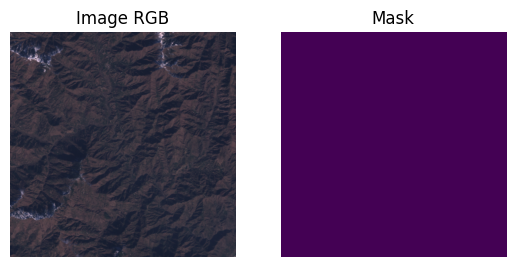

In [4]:
show_img_mask(no_glac, no_glac_mask)

A mask of a glacier and all the considered combinations of bands

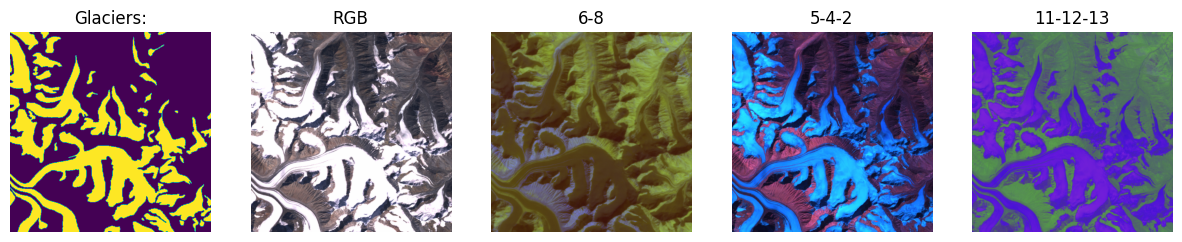

In [147]:
plt.figure(figsize=(15,20))
show_bands(glac, glac_mask)

A mask of a NON glacier and all the considered combinations of bands

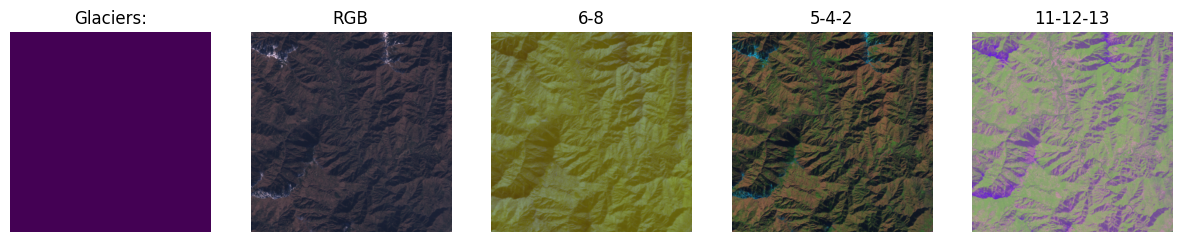

In [148]:
plt.figure(figsize=(15,20))
show_bands(no_glac, no_glac_mask)

A color Histogram of certain bands

<AxesSubplot: title={'center': 'Histogram of Colors'}, xlabel='5-4-2 channels', ylabel='density'>

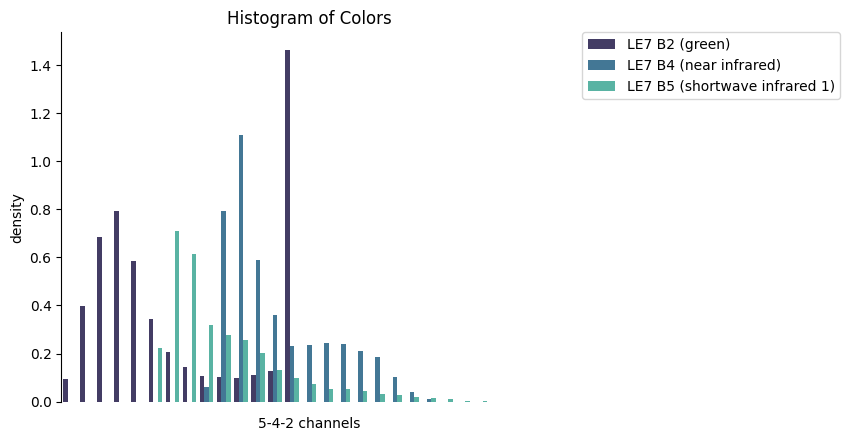

In [124]:
show_hist(glac_hist, kind='5-4-2')

An image and its color histogram

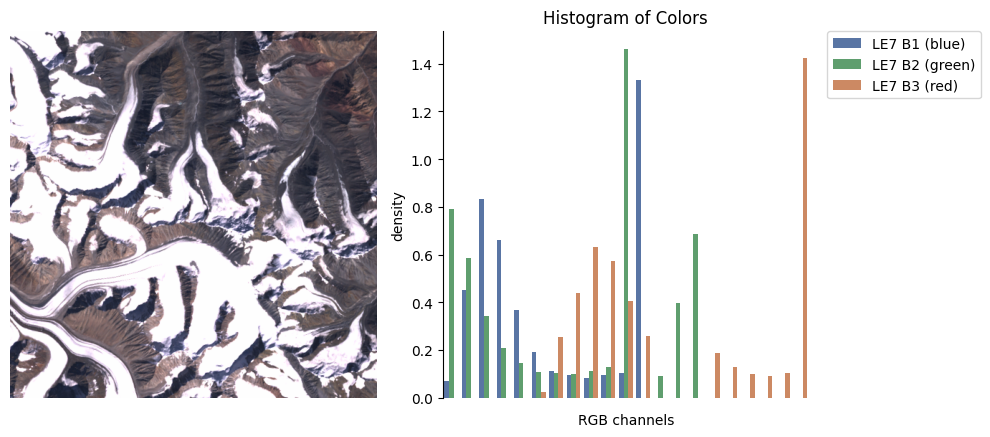

In [137]:
show_img_hist(glac, glac_hist)

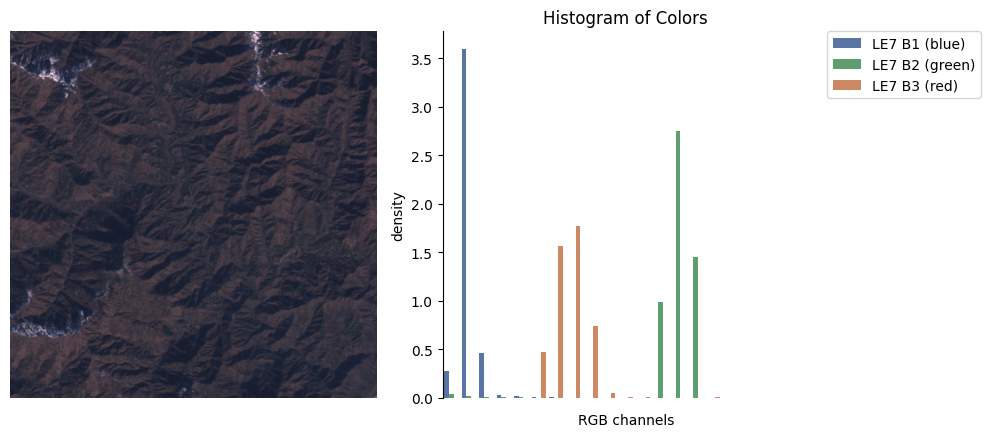

In [138]:
show_img_hist(no_glac, no_glac_hist)

Also for different bands:

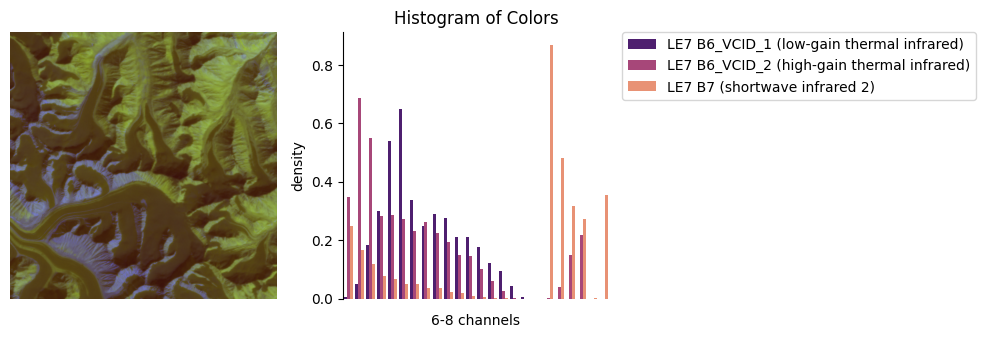

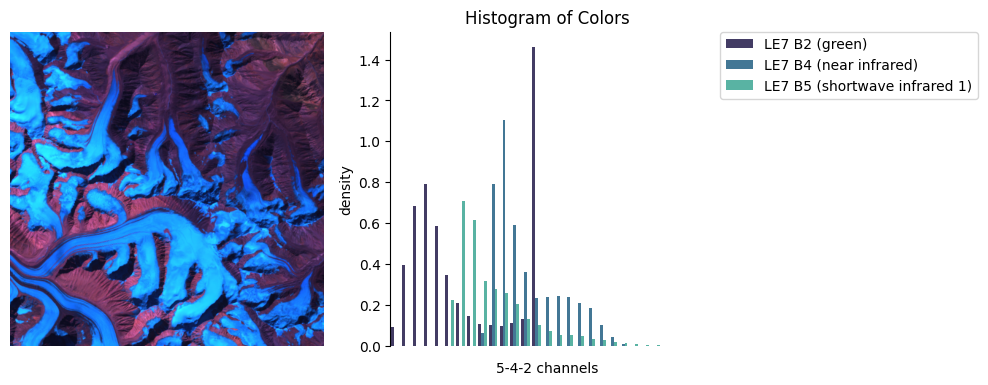

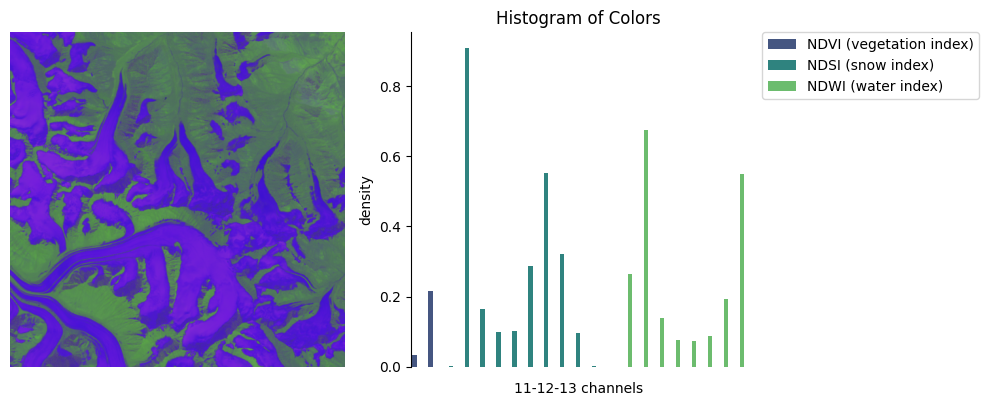

In [151]:
show_img_hist(glac, glac_hist, channel='6-8')
show_img_hist(glac, glac_hist, channel='5-4-2')
show_img_hist(glac, glac_hist, channel='11-12-13')

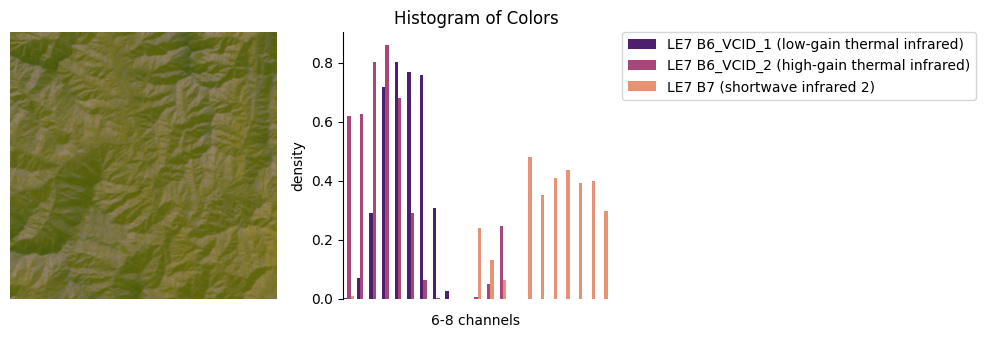

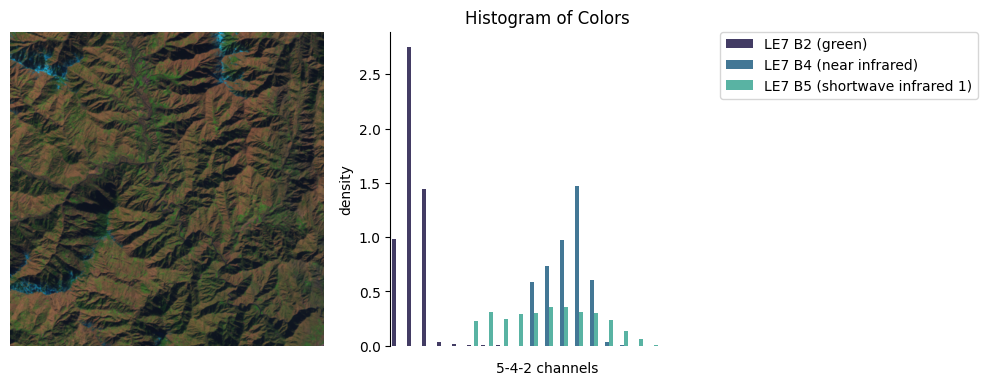

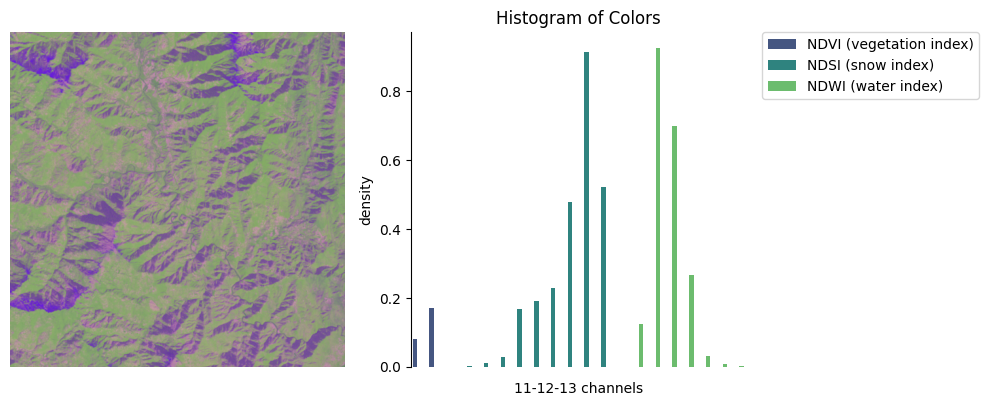

In [142]:
show_img_hist(no_glac, no_glac_hist, channel='6-8')
show_img_hist(no_glac, no_glac_hist, channel='5-4-2')
show_img_hist(no_glac, no_glac_hist, channel='11-12-13')